<a href="https://colab.research.google.com/github/friedporkdumplings/ff25_databootcamp_midterm/blob/main/Last_fmExploratoryDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Last.fm Exploratory Data Analysis**

Group Members: Hanzhe Jiang (hj2614), Jae Huang (jh9004)

We analyze global listening patterns using the Last.fm API to compare countries, explore genre/tag signals, and surface artist recommendations.

Data Source: Last.fm API

Endpoints Used: geo.getTopArtists, geo.getTopTracks, tag.getTopArtists, artist.getSimilar, artist.getTopTags


#**Project Overview**
This project explores listening trends across countries and genres using the Last.fm API. It examines country-level differences in artist and track popularity, while also identifying music genre trends, alongside artist recommendations. We use API requests, data cleaning, and data visualization to highlight local music preferences as well as universal musical patterns.

# **Driving Questions**

1. How do popular artists and tracks differ across countries, and what does this reveal about cultural listening preferences?

2. Which genres and tags dominate global music scenes, and how do they overlap or remain distinct?

3. Can frequency-based recommendations reveal clusters of artists with similar audiences across genres?

4. How consistent are popular tags across genres, and what does this imply about evolving genre boundaries?

# **Imports & Global Config**

In [ ]:
# needed imports
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import ttest_ind
import numpy as np
import time
import ipywidgets as widgets
from IPython.display import display

# **API Setup**

In [ ]:
# basic api setup
api_key = '8adc33e505997166d833c6299b39e8a2'
base_url = 'http://ws.audioscrobbler.com/2.0/'

#**Section A: Country-Level Top Artists**
Key Features:
* Fetches top artists by country using geo.getTopArtists.

* Cleans and normalizes data for country and listener count.

* Visualizes results using bar plots to compare artist popularity across countries.

*  Shows descriptive insights into international music trends.
---
Our Analysis:

Results show how listening preferences vary across different regions. For instance, internationally famous artists like Taylor Swift and The Weeknd consistently appear across multiple countries, suggesting their shared global fandom. At the same time, local artists often dominate domestic charts, revealing the balance between globalization and local taste in music.

In [ ]:
# fetch top artists per country
def get_top_artists_by_country(country, limit=10):
    params = {
        'method': 'geo.gettopartists',
        'country': country,
        'api_key': api_key,
        'format': 'json',
        'limit': limit
    }
    response = requests.get(base_url, params=params)

    # error handling
    if response.status_code != 200:
        print(f"Failed for {country}: {response.status_code}")
        return []

    try:
        artists = response.json()['topartists']['artist']
        return [{
            'country': country,
            'artist': a['name'],
            'listeners': int(a['listeners']),
            'url': a['url']
        } for a in artists]

    except Exception as e:
        print(f"Error parsing data for {country}: {e}")
        return []

In [ ]:
# some top countries last.fm has data on
countries = [
    "united states", "brazil", "germany", "canada", "united kingdom",
    "australia", "mexico", "korea, republic of",
    "sweden", "india", "poland", "norway"
]
all_artists = []

for country in countries:
    print(f"Fetching top artists for {country}...")
    country_artists = get_top_artists_by_country(country, limit=20)
    all_artists.extend(country_artists)
    #avoid api limit
    time.sleep(0.5)

Fetching top artists for united states...
Fetching top artists for brazil...
Fetching top artists for germany...
Fetching top artists for canada...
Fetching top artists for united kingdom...
Fetching top artists for australia...
Fetching top artists for mexico...
Fetching top artists for korea, republic of...
Fetching top artists for sweden...
Fetching top artists for india...
Fetching top artists for poland...
Fetching top artists for norway...


In [ ]:
# table of raw data fetched from the dataframe
df_artists = pd.DataFrame(all_artists)
print("Top artists loaded:")
df_artists.groupby('country').head()

Top artists loaded:


,country,artist,listeners,url
0,united states,"Tyler, The Creator",267624,"https://www.last.fm/music/Tyler,+The+Creator"
1,united states,Kendrick Lamar,233821,https://www.last.fm/music/Kendrick+Lamar
2,united states,Radiohead,228545,https://www.last.fm/music/Radiohead
3,united states,Drake,221536,https://www.last.fm/music/Drake
4,united states,Kanye West,217124,https://www.last.fm/music/Kanye+West
20,brazil,Taylor Swift,122541,https://www.last.fm/music/Taylor+Swift
21,brazil,Lady Gaga,115273,https://www.last.fm/music/Lady+Gaga
22,brazil,Ariana Grande,111451,https://www.last.fm/music/Ariana+Grande
23,brazil,Sabrina Carpenter,107396,https://www.last.fm/music/Sabrina+Carpenter
24,brazil,The Weeknd,104244,https://www.last.fm/music/The+Weeknd


## A.1 Visualization: Top Artists by Country

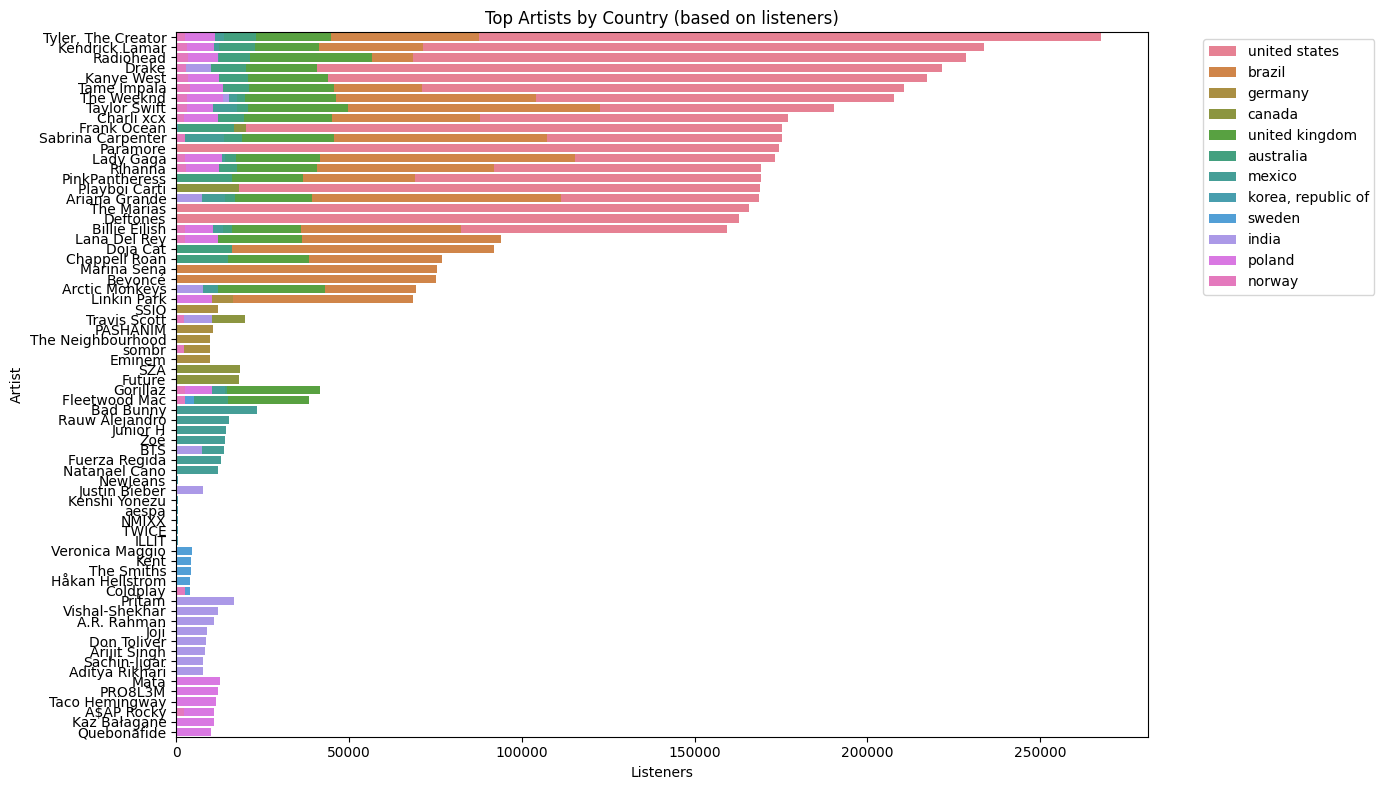

In [ ]:
# top artists and their fans contribution
plt.figure(figsize=(14, 8))
sns.barplot(data=df_artists, x='listeners', y='artist', hue='country', dodge=False)
plt.title('Top Artists by Country (based on listeners)')
plt.xlabel('Listeners')
plt.ylabel('Artist')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show();

# **Section B: Country-Level Top Tracks**
Key Features:
* Gets the most popular tracks for the same set of countries using geo.getTopTracks.
* Cleans up the track data and displays the top ranked tracks based on listener count.
* Visualizes comparisons using horizontal bar charts.
* Shows different patterns between artist and track popularity.
---
Our Analysis:

Based on our track-level analysis for top played tracks in our list of countries, data shows that a country's most played track may not be from the country's most played artist. This highlights how individual songs, rather than entire artists, can become cross-border phenomena.

In [ ]:
# fetch top tracks per country
def get_top_tracks_by_country(country, limit=10):
    params = {
        'method': 'geo.gettoptracks',
        'country': country,
        'api_key': api_key,
        'format': 'json',
        'limit': limit
    }
    response = requests.get(base_url, params=params)

    # error handling
    if response.status_code != 200:
        print(f"Failed for {country}: {response.status_code}")
        return []

    try:
        tracks = response.json()['tracks']['track']
        return [{
            'country': country,
            'track': t['name'],
            'listeners': int(t['listeners']),
            'url': t['url']
        } for t in tracks]

    except Exception as e:
        print(f"Error parsing data for {country}: {e}")
        return []

In [ ]:
# some top countries last.fm has data on
countries = [
    "united states", "brazil", "germany", "canada", "united kingdom",
    "australia", "mexico", "korea, republic of",
    "sweden", "india", "poland", "norway"
]
all_tracks = []

for country in countries:
    print(f"Fetching top tracks for {country}...")
    country_tracks = get_top_tracks_by_country(country, limit=5)
    all_tracks.extend(country_tracks)
    time.sleep(0.5)

Fetching top tracks for united states...
Fetching top tracks for brazil...
Fetching top tracks for germany...
Fetching top tracks for canada...
Fetching top tracks for united kingdom...
Fetching top tracks for australia...
Fetching top tracks for mexico...
Fetching top tracks for korea, republic of...
Fetching top tracks for sweden...
Fetching top tracks for india...
Fetching top tracks for poland...
Fetching top tracks for norway...


## B.1 Visualization: Top Tracks by Country

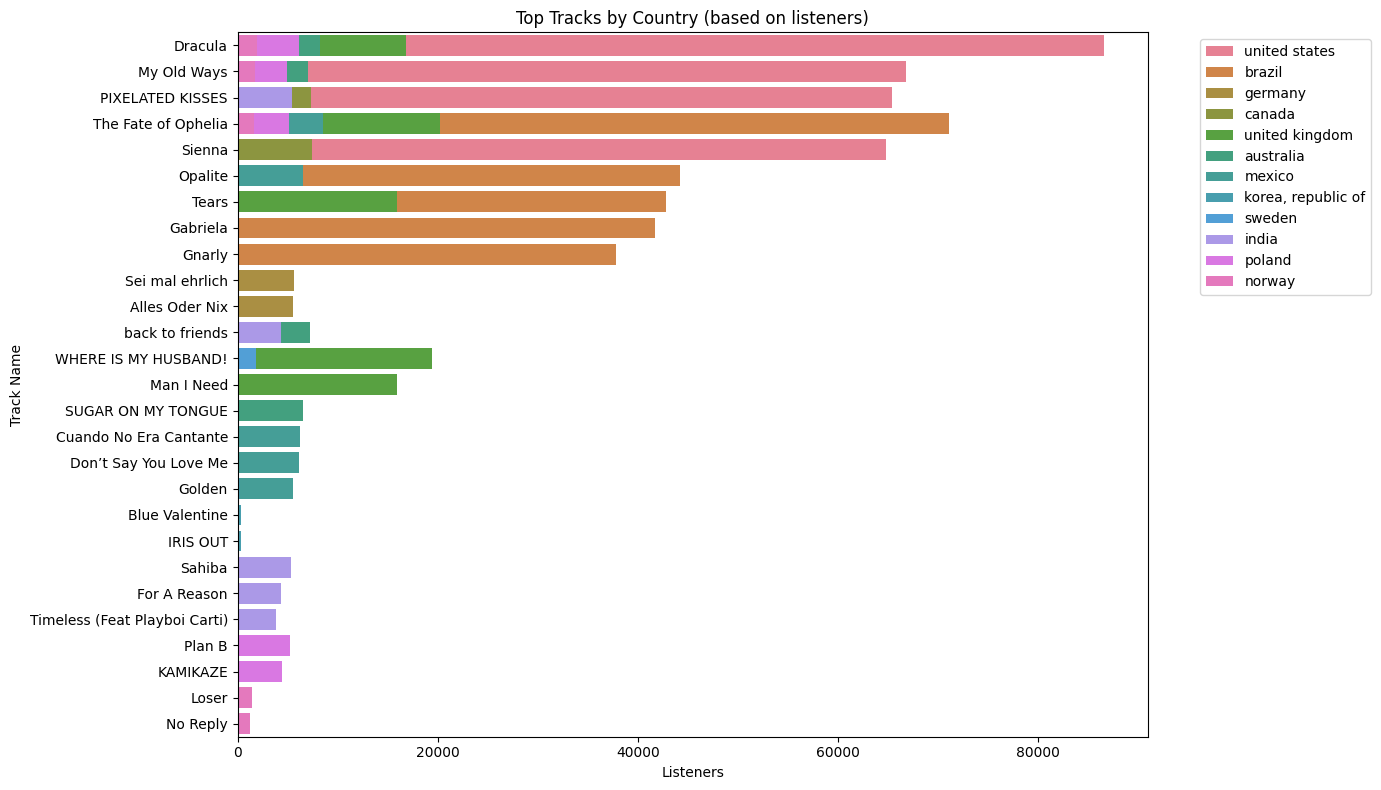

In [ ]:
df_tracks = pd.DataFrame(all_tracks)
plt.figure(figsize=(14, 8))
sns.barplot(data=df_tracks, x='listeners', y='track', hue='country', dodge=False)
plt.title('Top Tracks by Country (based on listeners)')
plt.xlabel('Listeners')
plt.ylabel('Track Name')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#**Section C: Artist Similarity and Recommendation**
Key Features:
* Uses tag.getTopArtists to collect top artists associated with each genre (eg. pop, rock, hip-hop, electronic, jazz, R&B).
* Uses artist.getSimilar to collect similar artists based on built in Last.fm method given artist name
* Uses a simple interactive diagram to let users explore the results of top artists within a genre dynamically.
---
Our Analysis:

Artists appearing repeatedly in the top artists list for different genres often serve as genre “bridges” due to their verstile discogrpahy and music profile. For instance, artists like Kanye West or Kendrick Lamar show strong overlap between rap and hip-hop for top artists. This highlights cross-genre influences and also shows potential fanbase overlaps.

In [ ]:
# top artist by tag/genre
def get_top_artists_by_tag(tag, limit=15):
    params = {
        'method': 'tag.getTopArtists',
        'tag': tag,
        'api_key': api_key,
        'format': 'json',
        'limit': limit
    }
    response = requests.get(base_url, params=params).json()
    artists = response['topartists']['artist']
    return pd.DataFrame([{
        'Artist': a['name'],
    } for a in artists])

get_top_artists_by_tag('pop')

,Artist
0,Sabrina Carpenter
1,Ariana Grande
2,Lady Gaga
3,Tate McRae
4,Taylor Swift
5,Chappell Roan
6,Rihanna
7,Olivia Rodrigo
8,Justin Bieber
9,Doja Cat


In [ ]:
# similar artists + match score
def get_similar_artists(artist_name, limit=10):
    params = {
        'method': 'artist.getSimilar',
        'artist': artist_name,
        'api_key': api_key,
        'format': 'json',
        'limit': limit
    }
    response = requests.get(base_url, params=params).json()
    artists = response['similarartists']['artist']
    return pd.DataFrame([{
        'Similar Artist': a['name'],
        'Match Score': float(a['match'])
    } for a in artists])


##C.1 Quick Demo Plot

/tmp/ipython-input-2337913813.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_similar, y='Similar Artist', x='Match Score', palette='crest')


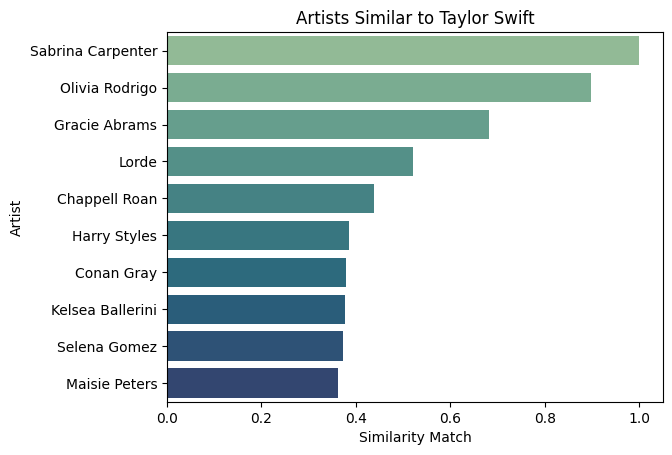

In [ ]:
# Example: find similar artists to "Taylor Swift"
df_similar = get_similar_artists('Taylor Swift')
sns.barplot(data=df_similar, y='Similar Artist', x='Match Score', palette='crest')
plt.title('Artists Similar to Taylor Swift')
plt.xlabel('Similarity Match')
plt.ylabel('Artist')
plt.show()

##C.2 Interactive: Top Artists by Genre (Dropdown Selection)

In [ ]:
# get the top artists for each genre
def display_top_artists(genre):
    print(f"Showing top artists for {genre} genre...")
    df = get_top_artists_by_tag(genre.lower())
    display(df.head(10))

dropdown = widgets.Dropdown(
    options=['Pop', 'Rock', 'Rap', 'Hip-Hop', 'Jazz', 'Electronic', 'R&B','House', 'Indie'],
    value='Pop',
    description='Genre:'
)

widgets.interactive(display_top_artists, genre=dropdown)


interactive(children=(Dropdown(description='Genre:', options=('Pop', 'Rock', 'Rap', 'Hip-Hop', 'Jazz', 'Electr…

#**Section D: Frequency-Based Genre Recommender**
* Uses the get_recommended_artists_by_genre() function to generate recommendations based on how often artists appear as “similar” across multiple genre artists.

* Cleans up the data for similarity frequency and computes average match scores across multiple genres. Uses two key factors, frequency: how many times an artist appears in other artists’ similarity lists and average match score: the mean similarity returned by the Last.fm API.

* Visualizes results using bar charts (frequency) and scatter plots (frequency vs. match score).

* Implements sliders and dropdown widgets for interactivity and exploration for the recommendations results
---

Analysis:
The recommendation results reveals that certain artists that are the genre "bridges" like The Weeknd, Drake, or Taylor Swift tend to appear repeatedly across multiple genres which shows their broad audience overlap and cross-genre appeal. Their high frequency and strong match scores show that Last.fm’s recommendation engine heavily weights artists who blend mainstream and genre-specific characteristics. On another hand, there are niche artists appear with lower frequency but higher match scores, reflecting their specialized fan bases.

In [ ]:
# function of frequency-based music recommendations using top artists and simular artists methods
def get_recommended_artists_by_genre(genre, top_artists_limit=15, similar_limit=10, min_occurrences=2):
    # get the top artists
    top_artists_df = get_top_artists_by_tag(genre.lower(), limit=top_artists_limit)

    if top_artists_df.empty:
        print(f"No artists found for genre: {genre}")
        return pd.DataFrame()

    print(f"Analyzing {len(top_artists_df)} top {genre} artists...")

    # get simular artists
    all_similar_artists = []

    for artist in top_artists_df['Artist']:
        try:
            similar_df = get_similar_artists(artist, limit=similar_limit)
            # add source information to show user who this recommended artist is simular with
            for _, row in similar_df.iterrows():
                all_similar_artists.append({
                    'Artist': row['Similar Artist'],
                    'Match Score': row['Match Score'],
                    'Recommended By': artist,
                    'Source Count': 1  # helper for counting
                })
            print(f"Found similar artists for: {artist}")
        except Exception as e:
            print(f"Could not get similar artists for {artist}: {e}")

    if not all_similar_artists:
        print("No similar artists found.")
        return pd.DataFrame()

    # convert to df
    similar_df = pd.DataFrame(all_similar_artists)

    # count the occurrences and calculate average match score
    recommendations = similar_df.groupby('Artist').agg({
        'Match Score': 'mean',
        'Source Count': 'sum',
        'Recommended By': lambda x: list(x)[:5]  # Show first 5 sources
    }).reset_index()

    recommendations = recommendations.rename(columns={
        'Source Count': 'Frequency',
        'Match Score': 'Avg Match Score',
        'Recommended By': 'Sources'
    })

    # filter by minimum occurrences and sort by frequency
    recommendations = recommendations[recommendations['Frequency'] >= min_occurrences]
    recommendations = recommendations.sort_values(['Frequency', 'Avg Match Score'], ascending=[False, False])

    return recommendations

In [ ]:
# display and visualize the recommended artists
def visualize_recommendations(genre, top_artists_limit=15, similar_limit=10, min_occurrences=2):
    df = get_recommended_artists_by_genre(genre, top_artists_limit, similar_limit, min_occurrences)

    if df.empty:
        print(f"No recommendations found for {genre} with minimum {min_occurrences} occurrences.")
        return

    print(f"\n Top Recommended Artists in {genre} Genre:")
    print(f"Based on analysis of {top_artists_limit} top {genre} artists")
    print(f"Artists recommended by at least {min_occurrences} sources\n")

    display(df.head(15))
    plt.rcParams['text.usetex'] = False

    # create visualization
    plt.figure(figsize=(14, 10))

    # plot 1 = recommendations based on frequency
    plt.subplot(2, 1, 1)
    top_artists = df.head(10)
    bars = plt.barh(top_artists['Artist'], top_artists['Frequency'], color='skyblue')
    plt.xlabel('Number of Recommendations')
    plt.title(f'Most Frequently Recommended Artists in {genre} Genre')
    plt.gca().invert_yaxis()

    # add value labels on bars
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, f' {width}',
                ha='left', va='center')

    # plot 2 = average match score vs frequency
    plt.subplot(2, 1, 2)
    plt.scatter(df['Frequency'], df['Avg Match Score'], alpha=0.6, s=100)
    plt.xlabel('Number of Recommendations')
    plt.ylabel('Average Match Score')
    plt.title('Recommendation Frequency vs Match Quality')

    # label the top points
    for i, row in df.head(8).iterrows():
        plt.annotate(row['Artist'],
                    (row['Frequency'], row['Avg Match Score']),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=9, alpha=0.8)

    plt.tight_layout()
    plt.show()

    # print some insights
    print(f"\nInsights:")
    print(f"Total unique artists considered: {len(df)}")
    print(f"Most recommended artist: {df.iloc[0]['Artist']} (recommended by {df.iloc[0]['Frequency']} sources)")
    print(f"Highest average match: {df.loc[df['Avg Match Score'].idxmax()]['Artist']} ({df['Avg Match Score'].max():.3f})")

# create interactive version using widgets
def interactive_genre_recommender(genre='Pop', top_artists=15, similar_per_artist=10, min_occurrences=2):
    visualize_recommendations(genre, top_artists, similar_per_artist, min_occurrences)

genre_dropdown = widgets.Dropdown(
    options=['Pop', 'Rock', 'Rap', 'Hip-Hop', 'Jazz', 'Electronic', 'R&B','House', 'Indie'],
    value='Pop',
    description='Genre:'
)

top_artists_slider = widgets.IntSlider(
    value=15,
    min=5,
    max=30,
    step=5,
    description='Top Artists:'
)

similar_slider = widgets.IntSlider(
    value=10,
    min=5,
    max=20,
    step=5,
    description='Similar per Artist:'
)

occurrences_slider = widgets.IntSlider(
    value=2,
    min=1,
    max=5,
    step=1,
    description='Min Occurrences:'
)

# Interactive widget
widgets.interactive(interactive_genre_recommender,
                   genre=genre_dropdown,
                   top_artists=top_artists_slider,
                   similar_per_artist=similar_slider,
                   min_occurrences=occurrences_slider)


interactive(children=(Dropdown(description='Genre:', options=('Pop', 'Rock', 'Rap', 'Hip-Hop', 'Jazz', 'Electr…

#**Section E: Tag Distribution Analysis by Genre**
* Collects top tags for each artist in multiple genres using artist.getTopTags.

* Cleans up the results into a tag-frequency table

* Summarize top tags per genre w/ text output.
---
Analysis:

The tag distribution results shows both clear genre identities alongside areas of cross-genre overlap. Core genres like jazz and hip-hop maintain strong, self-defining tags (“jazz,” “blues,” “rap,” “hip-hop”), which reflect more cohesive listener communities. In contrast, pop, R&B, and electronic have multiple shared descriptors such as “pop,” “dance,” and “female vocalists.” Overall, the data supports the idea that genres are becoming increasingly interconnected in regards to their listeners. Therefore, as a result of increasing interconnectivity, algorithms also tend to categorize artists across overlapping mood, style, and cultural boundaries.

In [ ]:
# find top tags for an artist

def get_artist_tags(artist_name, limit=10):
    params = {
        'method': 'artist.getTopTags',
        'artist': artist_name,
        'api_key': api_key,
        'format': 'json',
        'limit': limit
    }
    response = requests.get(base_url, params=params).json()

    try:
        tags = response['toptags']['tag']
        return pd.DataFrame([{
            'Tag': t['name'],
            'Count': int(t['count'])
        } for t in tags])
    except Exception as e:
        print(f"Error getting tags for {artist_name}: {e}")
        return pd.DataFrame()

get_artist_tags("Taylor Swift")

,Tag,Count
0,country,100
1,pop,85
2,female vocalists,42
3,singer-songwriter,29
4,acoustic,11
5,country pop,4
6,taylor swift,4
7,american,1
8,snake,1
9,pop rock,1


Genre Tag Distribution Analysis - Top Artists
Analyzing tag distribution for pop genre...
   Processing  1/20: Sabrina Carpenter
   Processing  2/20: Ariana Grande
   Processing  3/20: Lady Gaga
   Processing  4/20: Tate McRae
   Processing  5/20: Taylor Swift
   Processing  6/20: Chappell Roan
   Processing  7/20: Rihanna
   Processing  8/20: Olivia Rodrigo
   Processing  9/20: Justin Bieber
   Processing 10/20: Doja Cat
   Processing 11/20: Billie Eilish
   Processing 12/20: KATSEYE
   Processing 13/20: Michael Jackson
   Processing 14/20: Katy Perry
   Processing 15/20: Britney Spears
   Processing 16/20: Bruno Mars
   Processing 17/20: Dua Lipa
   Processing 18/20: Charli xcx
   Processing 19/20: Miley Cyrus
   Processing 20/20: Addison Rae
Completed analysis for pop genre
Analyzing tag distribution for rock genre...
   Processing  1/20: Radiohead
   Processing  2/20: Paramore
   Processing  3/20: Linkin Park
   Processing  4/20: Coldplay
   Processing  5/20: Red Hot Chili Peppers


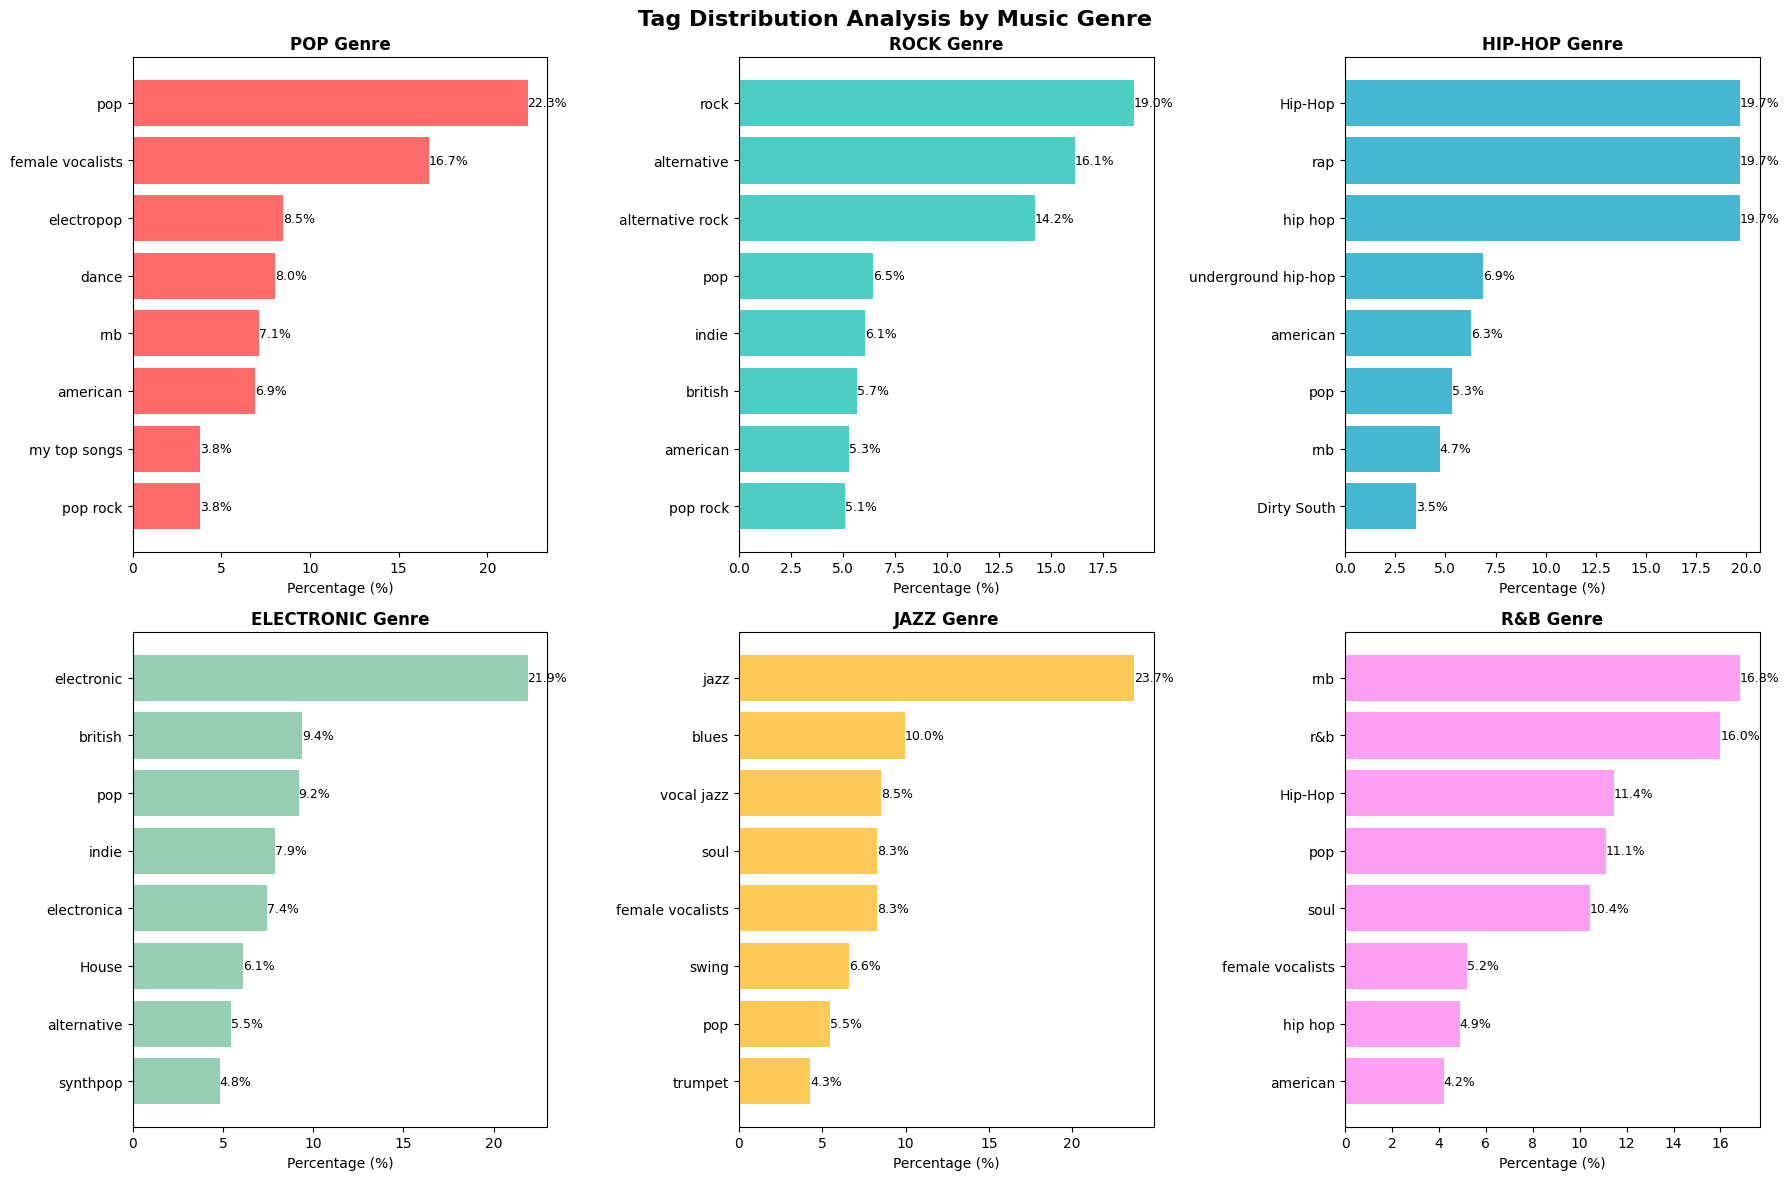

In [ ]:
# looking for tag distribution per genre
def get_top_tags_for_genre(genre, artist_limit=20):
    """Get tag distribution for top artists in a genre"""
    print(f"Analyzing tag distribution for {genre} genre...")

    artists_df = get_top_artists_by_tag(genre, limit=artist_limit)

    if artists_df.empty:
        print(f"Cannot get artist data for {genre} genre")
        return pd.DataFrame()

    all_tags = []

    for i, artist in enumerate(artists_df['Artist']):
        print(f"   Processing {i+1:2d}/{artist_limit}: {artist}")

        try:
            tags_df = get_artist_tags(artist)
            if not tags_df.empty:
                for _, row in tags_df.iterrows():
                    all_tags.extend([row['Tag']] * min(row['Count'], 5))
            time.sleep(0.1)
        except Exception as e:
            print(f"      Cannot get tags for {artist}: {e}")

    if not all_tags:
        print(f"No tag data collected for {genre} genre")
        return pd.DataFrame()

    tag_counts = Counter(all_tags)

    genre_tags_df = pd.DataFrame(
        tag_counts.most_common(15),
        columns=['Tag', 'Frequency']
    )

    genre_tags_df['Genre'] = genre
    genre_tags_df['Percentage'] = (genre_tags_df['Frequency'] / genre_tags_df['Frequency'].sum()) * 100

    print(f"Completed analysis for {genre} genre")
    return genre_tags_df

# compare tag profiles across genres
def analyze_genres_comparison():
    genres = ['pop', 'rock', 'hip-hop', 'electronic', 'jazz', 'r&b']

    print("Genre Tag Distribution Analysis - Top Artists")
    print("=" * 50)

    all_data = []

    for genre in genres:
        genre_df = get_top_tags_for_genre(genre, 20)
        if not genre_df.empty:
            all_data.append(genre_df)

    if not all_data:
        print("No data collected")
        return

    combined_df = pd.concat(all_data, ignore_index=True)
    create_genre_visualizations(combined_df)
    return combined_df

# Visualization
def create_genre_visualizations(combined_df):

    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', '#FF9FF3']

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Tag Distribution Analysis by Music Genre', fontsize=16, fontweight='bold')

    axes = axes.flatten()

    for i, genre in enumerate(combined_df['Genre'].unique()):
        ax = axes[i]
        genre_data = combined_df[combined_df['Genre'] == genre].head(8)

        bars = ax.barh(genre_data['Tag'], genre_data['Percentage'], color=colors[i])
        ax.set_xlabel('Percentage (%)')
        ax.set_title(f'{genre.upper()} Genre', fontweight='bold', fontsize=12)
        ax.invert_yaxis()

        for bar, percentage in zip(bars, genre_data['Percentage']):
            width = bar.get_width()
            ax.text(width, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%',
                   ha='left', va='center', fontsize=9)

    plt.tight_layout()
    plt.show()

# run the analysis
results = analyze_genres_comparison()

#**Findings & Insights**

###Reminder Driving Questions


1. How do popular artists and tracks differ across countries, and what does this reveal about cultural listening preferences?

2. Which genres and tags dominate global music scenes, and how do they overlap or remain distinct?

3. Can frequency-based recommendations reveal clusters of artists with similar audiences across genres?

4. How consistent are popular tags across genres, and what does this imply about evolving genre boundaries?


###Overall Findings

Country Comparisons: Top artist and track data show globalized listening dominated by pop artists, but with regional variations that highlight local music cultures. Thus, although music consumption is increasingly global, regional tastes still persist, preserving cultural distinctiveness.

Genre Dominance & Overlap: Tag distributions demonstrate both unique identities (jazz, hip-hop) and shared descriptors (pop, R&B, electronic), proving genre fluidity. Based on these factors, recommendation systems tend to favor artists with cross-genre appeal, promoting a cycle where popular artists become even more visible.

Artist Recommendation Clusters: Tag data and similarity graphs reveal that genres are evolving into interconnected ecosystems rather than rigid categories. Bridging off of cross-genre appeal, frequency-based analysis also supports artists with wide crossover appeal, highlighting how Last.fm’s algorithm builds interconnected listening networks.

Tag Consistency Across Genres: Overlapping tags like “pop,” “dance,” and “rnb” imply that listeners value vibe and sound over strict genre definitions, which reflecting modern, playlist driven music habits. The overlaps in tags like “pop” and “dance” reveal how listeners increasingly define music by feeling and energy rather than traditional genre labels.

###Conclusion
Overall, based on the data collected in this project in the analysis we conducted, we've concluded that the music ecosystem illustrated by the results is one that is shaped by both globalization and personalization. Nowadays, streaming algorithms and listener behavior blur the boundaries between genres, however, distinct cultural preferences still exist. While music may bring the world together, each audience still listens in their own unique own ways.


In [ ]:
# fix_notebook_with_widgets.py
"""
Script to fix Jupyter notebook widget metadata by adding correct widget structure.
This preserves widget functionality while fixing the rendering issue.
"""

import json
import shutil
from pathlib import Path


def fix_notebook_with_widgets(notebook_path, create_backup=True):
    """
    Fix widget metadata by adding correct widget structure.

    Parameters:
    notebook_path (str): Path to the notebook file
    create_backup (bool): Whether to create a backup before fixing
    """

    notebook_path = Path(notebook_path)

    # Create backup
    if create_backup:
        backup_path = notebook_path.parent / f"{notebook_path.stem}_backup{notebook_path.suffix}"
        shutil.copy2(notebook_path, backup_path)
        print(f"Backup created: {backup_path}")

    try:
        # Read the notebook
        with open(notebook_path, 'r', encoding='utf-8') as f:
            notebook_data = json.load(f)

        # Add correct widget structure to metadata
        # This goes in the notebook's metadata section
        if 'metadata' not in notebook_data:
            notebook_data['metadata'] = {}

        # Add the correct widget structure
        notebook_data['metadata']['widgets'] = {
            "application/vnd.jupyter.widget-state+json": {
                "state": {},
                "version_major": 2,
                "version_minor": 0
            }
        }

        print("✓ Correct widget structure added to metadata")

        # Save the fixed notebook
        with open(notebook_path, 'w', encoding='utf-8') as f:
            json.dump(notebook_data, f, indent=2, ensure_ascii=False)

        print(f"✓ Notebook fixed successfully: {notebook_path}")

    except Exception as e:
        print(f"✗ Error: {e}")


def main():
    """Main execution function"""

    NOTEBOOK_FILE = "LastFMDataBootCampMidterm.ipynb"

    print("Jupyter Notebook Widget Structure Fixer")
    print("=" * 45)

    if not Path(NOTEBOOK_FILE).exists():
        print(f"✗ Notebook file not found: {NOTEBOOK_FILE}")
        return

    fix_notebook_with_widgets(NOTEBOOK_FILE)
    print("\nWidget structure added. Notebook should render correctly now.")


if __name__ == "__main__":
    main()

Jupyter Notebook Widget Structure Fixer
✗ Notebook file not found: LastFMDataBootCampMidterm.ipynb
